# Sizing up *E. coli*
### Credit: Griffin Chure

## Basic `MATLAB` syntax

This script will introduce you to the syntax and various operations in the
MATLAB analysis language as well as introduce you to some image processing.
and sizing up *E. coli*. There are many different programming languages
(`python`, `C++`, `java`, `julia`, `matlab`, etc.) that are all very useful for
scientists in every discipline. While we will use Matlab for this course,
We urge you to not subscribe to any language with religous fervor.

There are several options, buttons, and windows in the Matlab GUI. The two
most useful windows for you will the the editor (scripting window) and the
command window (`>>`). The editor is where we will spend most of our time as
we write various scripts to perform analysis, simulations, and
calculations. However, the command window is good for testing small
snippets of code. The command window does not store your entries which is
why the editor window is so useful. To learn some of the Matlab syntax,
let's enter a few things into the command window.

In [1]:
1 + 1 % Should give us 2

ans =

     2


In [2]:
2 * 8 % I believe this should be 16

ans =

    16


In [3]:
exp(2) % This should be around 7.4

ans =

    7.3891


This are simple examples of basic operations one can do with Matlab. But at the same time, we can store values in memory as variables. Let's look at a simple example.

In [4]:
a = 10

a =

    10


Once a variable is defined we can do operations with it.

In [5]:
a * 4

ans =

    40


And again save the output of these operations as a new variable.

In [6]:
b = a * 4

b =

    40


I'm sure you got the idea, but just for completeness I would add that you can do operations using only variables; for example

In [8]:
b + a * 5

ans =

    90


Notice that every entry we have made so far has automatically been printed. We don't always want to see this, especially when we are generating huge tables or loading images. To suppress output, we simply need to add a semicolon (`;`) to the end of the line. 

In [9]:
c = a^100 % This will be printed
d = a^200; % This will NOT be printed

c =

  1.0000e+100


Another very useful feature from matlab is the ability of storing several entries into a single `vector` or `array` variable.

In [11]:
values = [0, 1, 1, 2, 3, 5, 8]; % Fibonacci sequence!

But what if I wanted to access let's say the 3rd element of this array? Well we can index the values on the array using parenthesis `()`.

In [12]:
values(3) % This should be a 1 since the third element of the array is 1

ans =

     1


It is interesting to note that matlab stores everything as matrices by default. As a matter of fact the name MATLAB comes from *MAT*rix *LAB*oratory, not mathematics laboratory as people generally think. Our variable `values` is actually a 1D matrix for example. We will exploit this feature a lot throughout the course.

There are several ways to generate arrays. A very useful one is to generate evenly spaced intervals. The syntax in matlab to generate this type of array is

`begin:step_size:end`

Let's look at a couple of examples

In [15]:
intervalOne = 1:1:10 % This will print numbers from 1 to 10 with spacing of 1

intervalOne =

     1     2     3     4     5     6     7     8     9    10


In [16]:
intervalTwo = 1:3:10 % This will print numbers from 1 to 10 with spacing of 3

intervalTwo =

     1     4     7    10


### Sizing up *E. coli* with real data.

Now that we have the basic syntax of Matlab down let's give it a test run on some real data. 

In the following lines of code, we will use an image of a graticule to  measure the distances between pixels of a camera. We will then use this  value to place a scale bar on an image of cells, **as should always be done in any scientific image**.

We will begin by reading in the image of the graticule. Remember, an image is just data -- a simple two-dimensional array in which element corresponds to a pixel value.

In [25]:
% Change the working directory to where our data lives in case we are not there
cd('~/Documents/PhD/RPGroup-PBoC_github/mbl_pboc_2016/data/sizing_up_ecoli/')
% Read the image of the gradicule
gratIm = imread('Graticule100x.tif');

Let's take a look at the image to see what we are dealing with. For this we will use the function `imshow`. Remember that an image is just a matrix with numbers. What `imshow` does is simply assign a color to each of these numbers on a gray scale

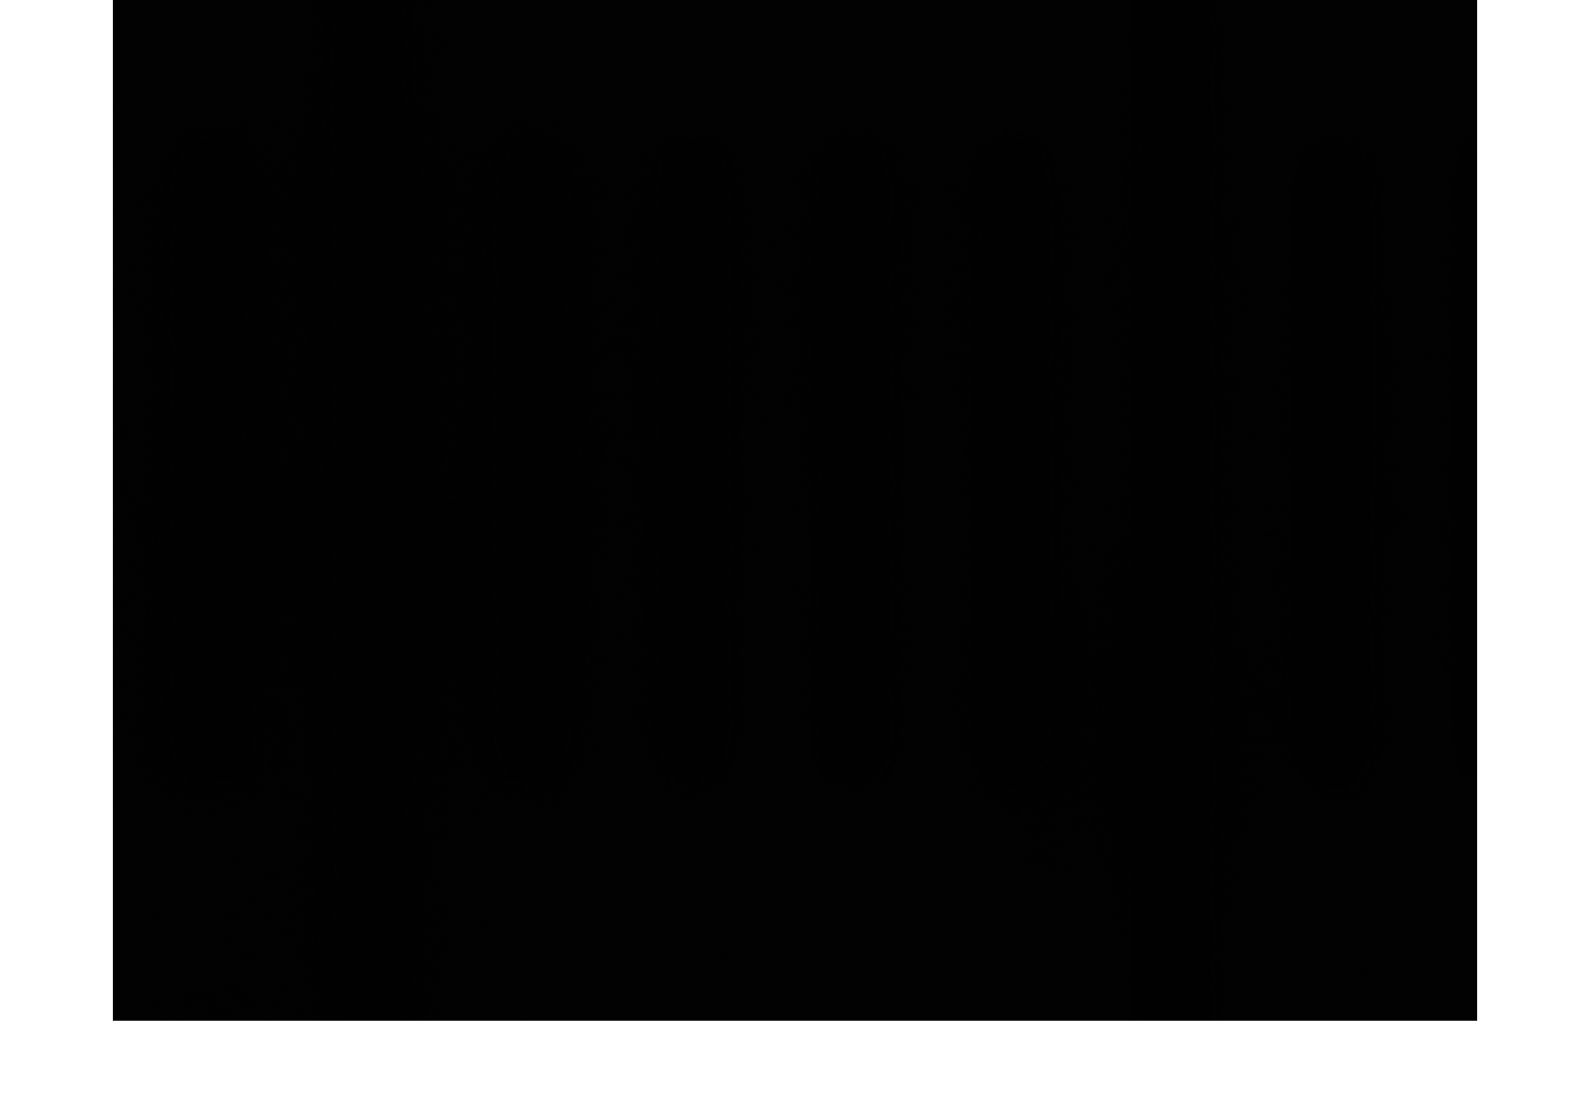

In [26]:
imshow(gratIm);

Oh no! Our image appears to be only black! This is because the image is actually 12 bit, but is being displayed as a 16 bit image. There is information in those pixels, but they are simply being displayed on a different scale. We can rescale all of the pixels in this image as follows.

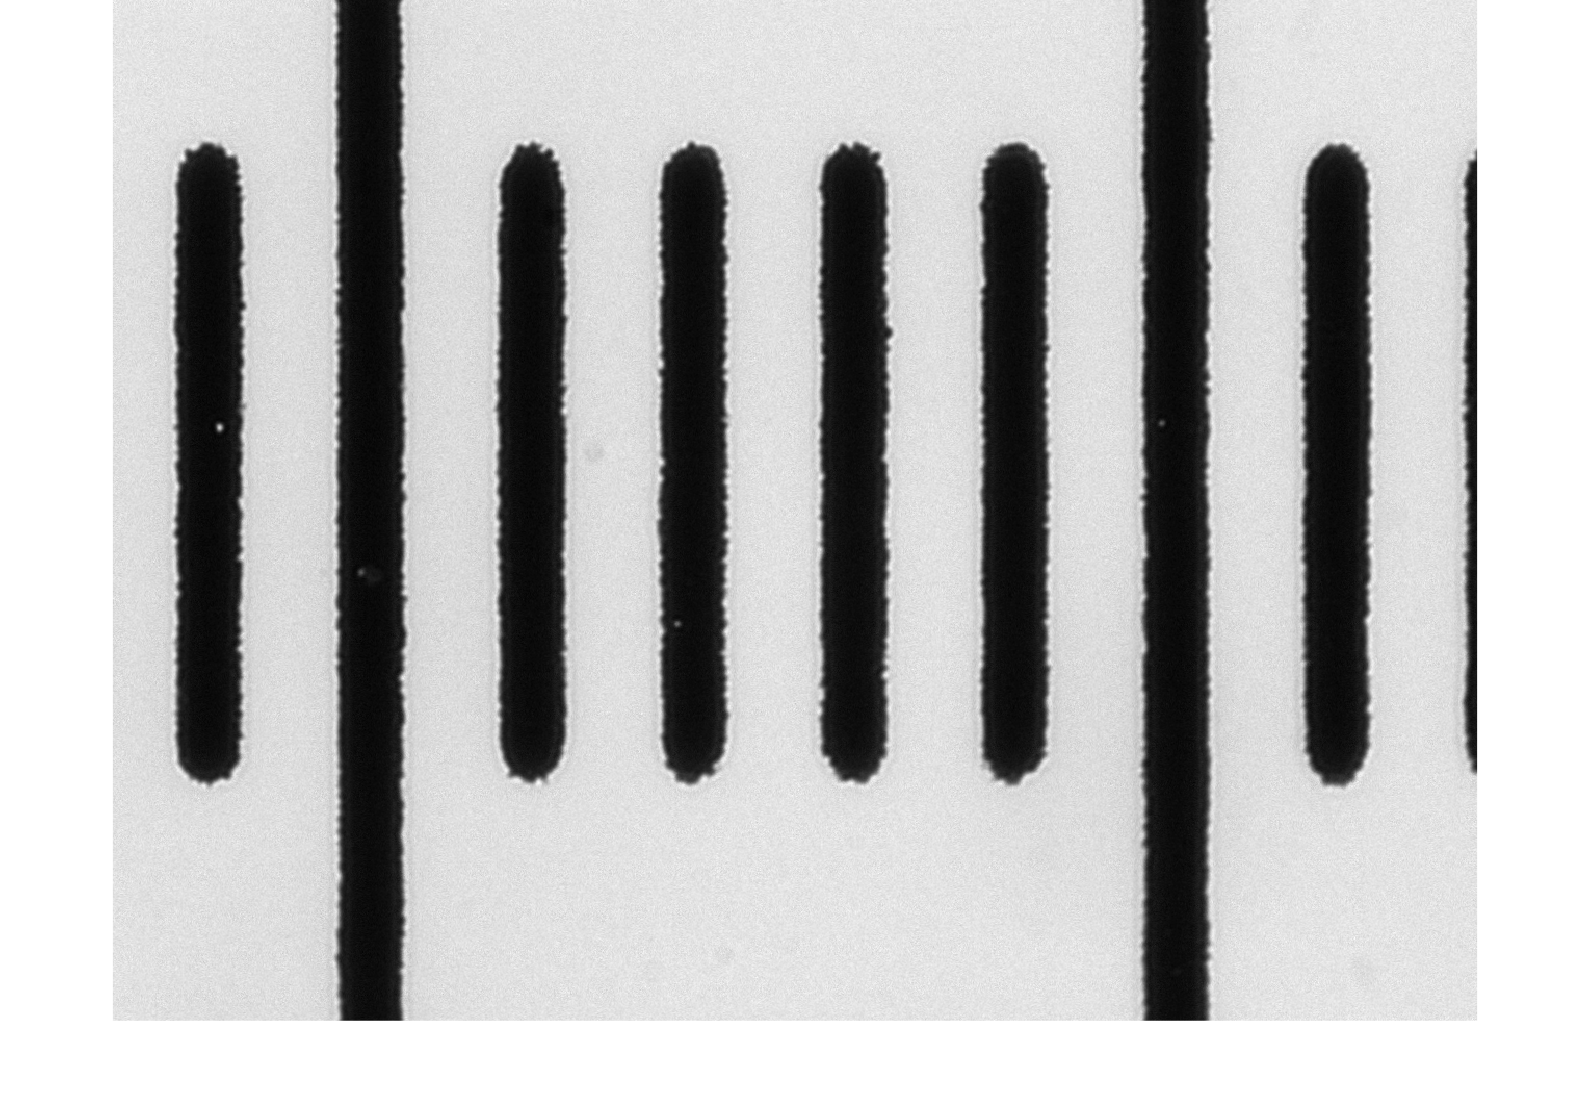

In [27]:
imshow(gratIm, []) % This should be a rescaled image.

Much better. This image shows a graticule -- a microscopic ruler. Each major division on this image is 10 microns apart. If we consider this image as an array, we see that if we were to go across a given row of the image, there would be a periodic oscillation in pixel values. Dark values would correspond to the ticks in the graticules while the white spaces would correspond to the spaces. Using this, let's extract the pixel value information for a single row in the image. Let's figure out what the size of the image is.

In [28]:
whos gratIm;

Name          Size                Bytes  Class     Attributes

  gratIm      982x1311            2574804  uint16


This tells us that the image is `982x1311`. To access to a row of values we need to learn how to index 2D arrays.

If you recall we saw that by using parenthesis `()` and a number we could access to any element on a 1D array. For a 2D array we use the same syntax except that we have `(row, column)` in order to indicate the position in both dimensions of the array.

In [29]:
gratIm(444, 123)

ans =

  uint16

   318


If we now want to access an entire row of this matrix we can use a semicolon in the `column` entry to indicate we want **all** of the entries from this row. Let's extract for example row 491.

In [37]:
lineProfile = gratIm(491, :);

We'll plot it against the length of the $x$ axis of the image.

But how can we obtain the length of the this axis? **It is never a good practice to hard code numbers like this**. In other words you wouldn't want to copy and paste the number that we obtained from printing `whos gratIm`. That is why matlab has a full suite of useful functions such as `length` that can be use for this.

Whenever you have a question about a function (or really anything in general) [Google](www.google.com) will be by far your best friend to answer those questions.

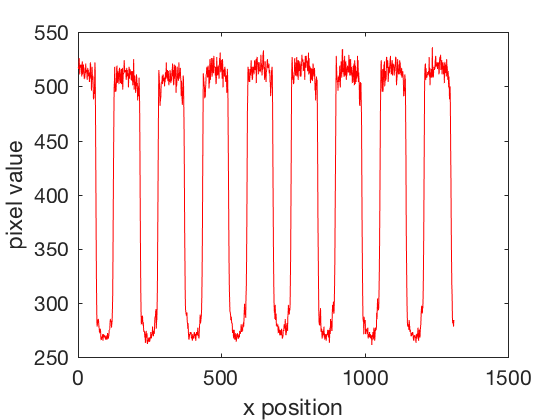

In [34]:
x = 1:1:length(lineProfile); % A vector from 1 to the length of the 
                              %line_profile taking steps of 1.
plot(x, lineProfile, 'r-'); %Plot the line_profile in red.

% Every good plot should have labeled axis.
xlabel('x position');
ylabel('pixel value');

Just by zooming in on the image, we can see that there is a valley in the pixel value at about pixel number 100 and another at 250. This means that by our crude estimate, the disance between pixels is as follows

In [36]:
crudeIPDist = 10 / 150; % microns / pixel

which is about 66 nm. This is actually a pretty good measure. If we want to be a little more creative, we can use mouse clicks to record the positions of the valleys and take the difference between those. Let's give that a shot.

For this we will use the super useful function `ginput`. `ginput` stands for `graphical input` and what it allows us is to click on any image in order to register the $x-y$ position of our clicks.

When creating this tutorial I cannot click directly on the image since the printed image is not an interactive object. But I did the following steps while working on the matlab terminal.

In [ ]:
% With the lineProfile plot open I used this function
clicks = ginput(2); % This will register the x-y position of 2 clicks

% Then I click on two continous lines. 
% The first column is the x-coordinate and the second is the y-coordinate. 
% Taking the difference of the first two will give us the distance. 

diff_clicks = clicks(2,1) - clicks(1,1);
click_ip_dist = 10 / diff_clicks;

Now I will violate our principle of never hard coding any number on a script. But this is a necessary violation only because I am not working directly on the matlab terminal.

In [47]:
clickIpDist = 0.0646;

This interpixel distance is about the same as we got by our crude estimate. Now that we have an idea of what the distance between pixels is, we can apply a scale bar to our image. Let's load it up.

In [39]:
cellIm = imread('Ecoli100x.tif');

Let's look at the image for fun

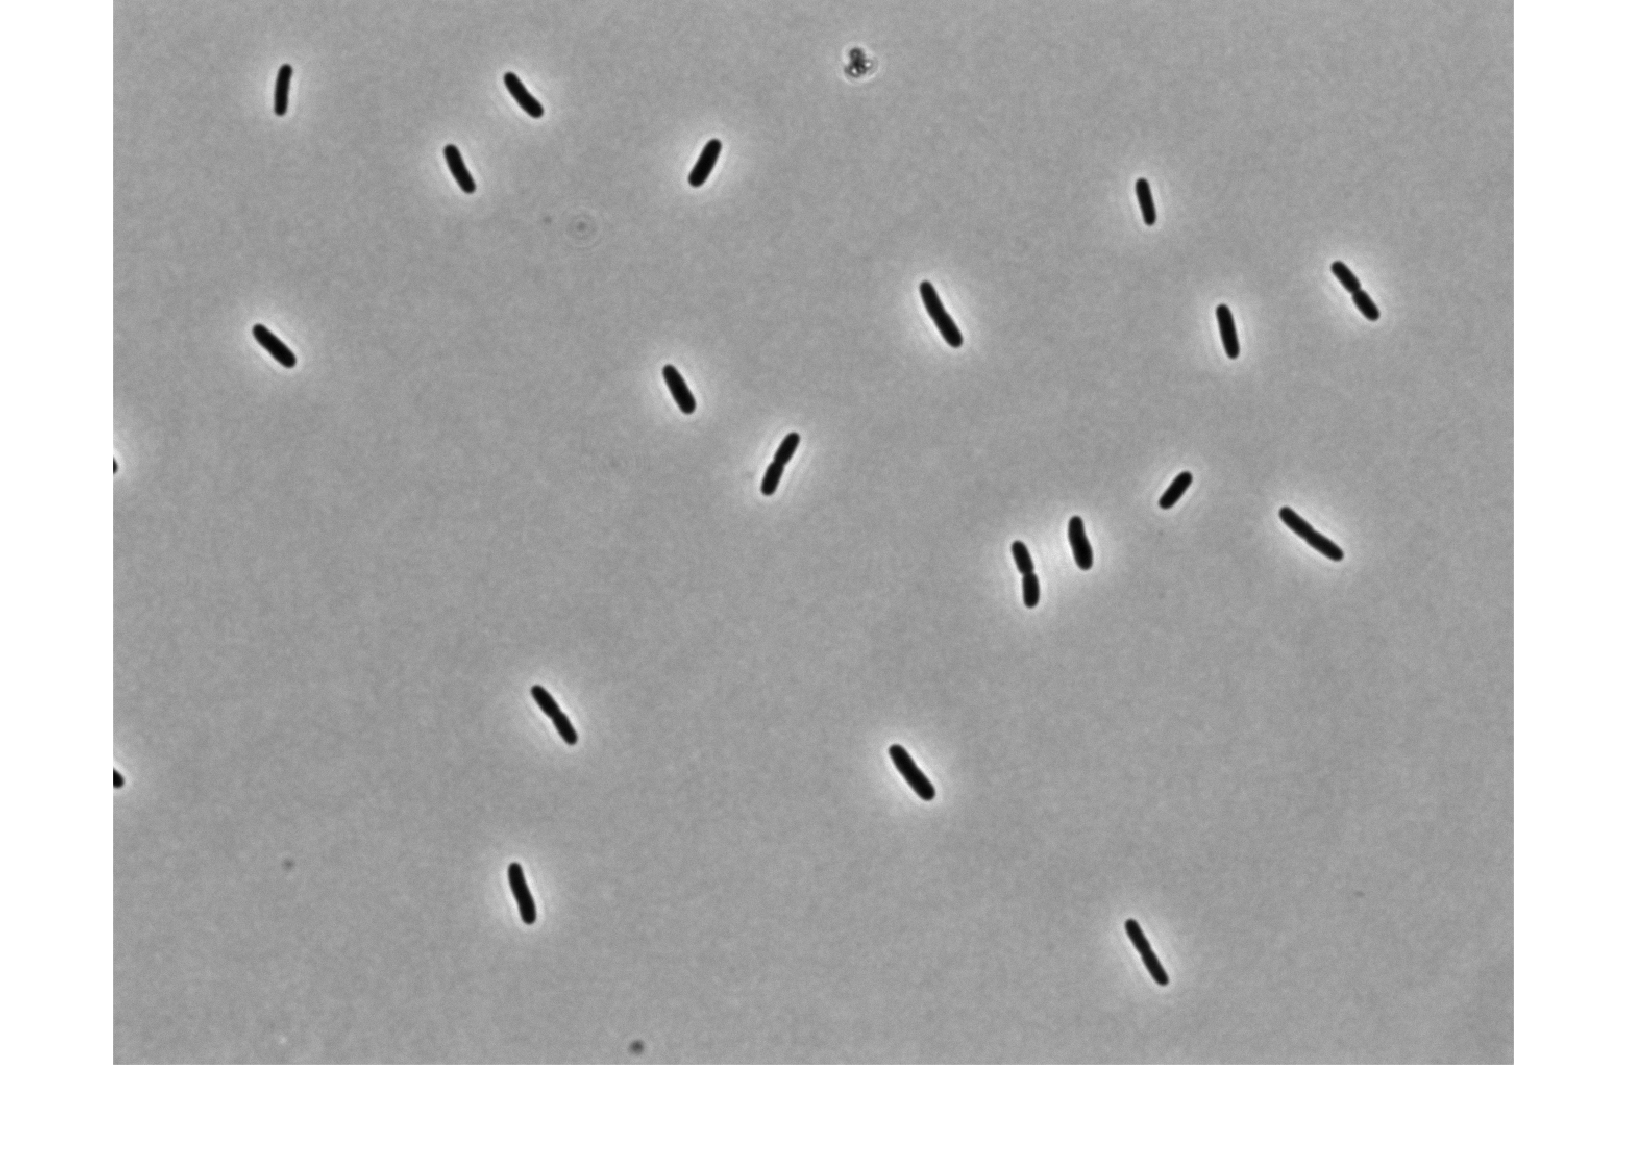

In [41]:
imshow(cellIm, []); % remember to rescale the pixel values!

Using the same procedure as we just did with `ginput` determine the length of one of these bacteria. I will again hard code the numbers I obtained by doing the clicking directly on the matlab terminal.

In [43]:
cellClicks = [558.0000  402.0000; 532.0000  356.0000];

Note: The semicolon (`;`) that I used in the middle of the array indicates matlab the end of a row in a 2D array.

Now how can we compute from these clicks the length of the bacteria if we only have x-y positions? You guessed it! Pythagoras taught us how to do this.

In [44]:
cellLenghtPix = sqrt((cellClicks(1, 1) - cellClicks(2, 1))^2 + ...
                     (cellClicks(1, 2) - cellClicks(2, 2))^2);

Now we can simply multiply the conversion factor between inter pixel distances and microns in order to obtain the length in microns.

In [48]:
cellLengthMicron = clickIpDist * cellLenghtPix % um

cellLengthMicron =

    3.4134


Not too bad! Let's put a 10 micron scale bar on our image. We can do that by changing a row of pixels 10 microns long on the image all to black. 

In [56]:
% Obtain the number of pixels equivalent to 10 microns
scaleBarLength = 10 / clickIpDist;

% Generate a copy of the image where we will burn in the scale bar
imScaleBar = cellIm; %Copy the image

% Change the value of the pixels that will become the scale bar to zero
imScaleBar(950:970, 20:20 + round(scaleBarLength)) = 0;

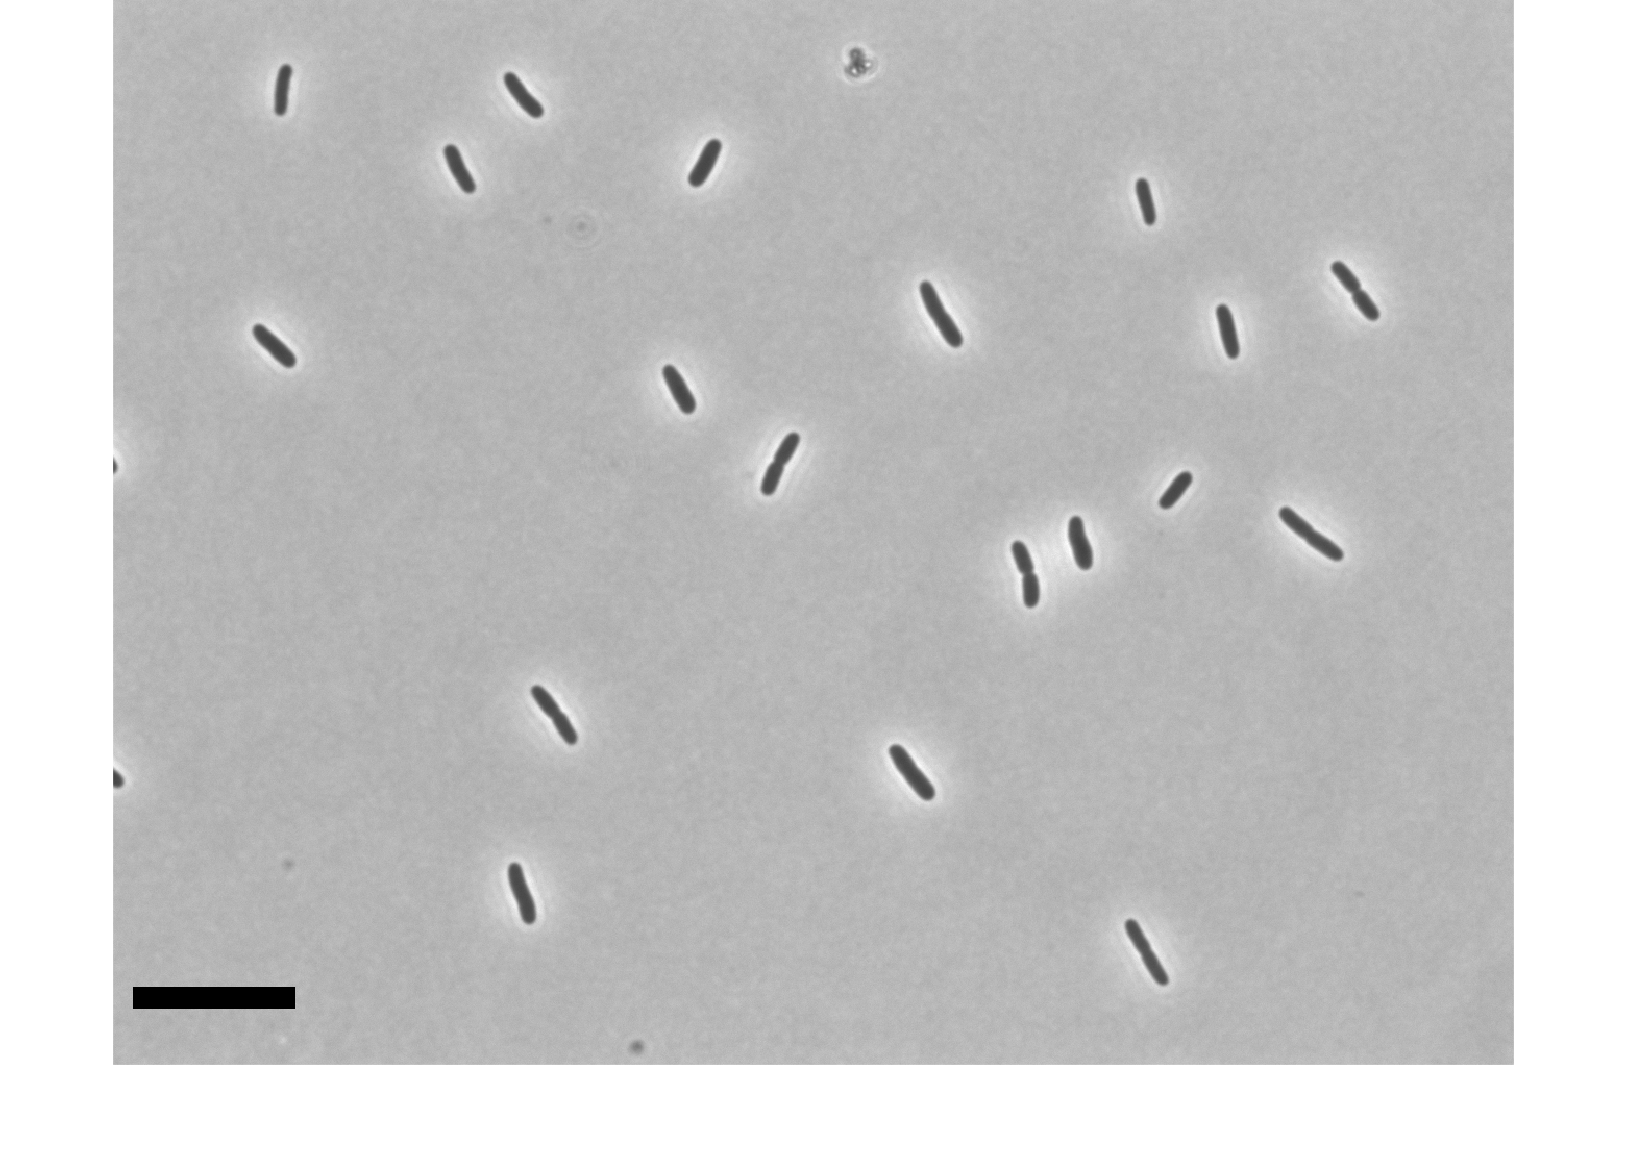

In [57]:
imshow(imScaleBar, [])

Now this picture is ready for publication! You would just need to explain in the caption that the scale bar was set to 10 $\mu$m.

You can save this modified image using the following command

In [ ]:
saveas(gcf, 'Ecoli_with_scalebar.tif'); %gcf = get current figure.